In [9]:
import pandas as pd

df = pd.read_csv('Dataset Datathon - Sheet1 (1).csv')

print("5 Baris Pertama Data:")
print(df.head())
print("\nInformasi Data (Tipe Data & Missing Values):")
print(df.info())

5 Baris Pertama Data:
  Kabupaten/Kota  Tahun  Luas Wilayah  Indeks Pembangunan Manusia (IPM)  \
0        Pacitan   2020       1389.92                             69.28   
1       Ponorogo   2020       1305.70                             71.57   
2     Trenggalek   2020       1147.22                             70.10   
3    Tulungagung   2020       1055.65                             73.15   
4         Blitar   2020       1336.48                             71.02   

   Harapan Lama Sekolah (Tahun)  Rata-rata Lama sekolah (Tahun)  \
0                         12.64                            7.60   
1                         13.73                            7.54   
2                         12.35                            7.55   
3                         13.31                            8.33   
4                         12.46                            7.39   

   Angka Partisipasi Sekolah (APS) Usia 7-12 (Persen)  \
0                                              99.82    
1         

In [10]:
df.columns = df.columns.str.strip().str.replace('\n', ' ').str.replace('  ', ' ').str.replace(' ', '_').str.lower()

df = df.rename(columns={
    'jumlah_masyarakat_miskin_dan_tidak_mampu_yang_dapat_mengakses_pelayanan_kesehatan_(orang)': 'jumlah_masyarakat_miskin_akses_kesehatan',
    'status_balita_gizi_kurang_bb': 'status_balita_gizi_kurang',
    'status_balita_kurus_bb_tb': 'status_balita_kurus',
    'status_balita_pendek_tb_u': 'status_balita_pendek'
})

print("\nNama Kolom Baru:")
print(df.columns)


Nama Kolom Baru:
Index(['kabupaten/kota', 'tahun', 'luas_wilayah',
       'indeks_pembangunan_manusia_(ipm)', 'harapan_lama_sekolah_(tahun)',
       'rata-rata_lama_sekolah_(tahun)',
       'angka_partisipasi_sekolah_(aps)_usia_7-12_(persen)',
       'angka_partisipasi_sekolah_(aps)_usia_13-15_(persen)',
       'angka_partisipasi_sekolah_(aps)_usia_16-18_(persen)',
       'angka_partisipasi_sekolah_(aps)_usia_19-23_(persen)',
       'rasio_guru_per_siswa', 'persentase_penduduk_(persen)',
       'persentase_penduduk_miskin_(persen)',
       'tingkat_pengangguran_terbuka_(tpt)_-_agustus',
       'tingkat_partisipasi_angkatan_kerja_-_agustus',
       'pengeluaran_per_kapita_riil_disesuaikan_(ribu_rupiah)',
       'persentase_rumah_tangga_dengan_akses_air_bersih',
       'laju_pertumbuhan_penduduk_per_tahun_(persen)',
       'kepadatan_penduduk_per_km_persegi_(km²)', 'gini_ratio',
       'jumlah_masyarakat_miskin_akses_kesehatan', 'jumlah_penerima_bansos',
       'jumlah_penduduk_(ribu)_s

In [11]:
df = df.interpolate(method='linear', limit_direction='forward', axis=0)

print("\nVerifikasi Missing Values setelah Interpolasi:")
print(df.isnull().sum())


Verifikasi Missing Values setelah Interpolasi:
kabupaten/kota                                           0
tahun                                                    0
luas_wilayah                                             0
indeks_pembangunan_manusia_(ipm)                         0
harapan_lama_sekolah_(tahun)                             0
rata-rata_lama_sekolah_(tahun)                           0
angka_partisipasi_sekolah_(aps)_usia_7-12_(persen)       0
angka_partisipasi_sekolah_(aps)_usia_13-15_(persen)      0
angka_partisipasi_sekolah_(aps)_usia_16-18_(persen)      0
angka_partisipasi_sekolah_(aps)_usia_19-23_(persen)      0
rasio_guru_per_siswa                                     0
persentase_penduduk_(persen)                             0
persentase_penduduk_miskin_(persen)                      0
tingkat_pengangguran_terbuka_(tpt)_-_agustus             0
tingkat_partisipasi_angkatan_kerja_-_agustus             0
pengeluaran_per_kapita_riil_disesuaikan_(ribu_rupiah)    0
persenta

/tmp/ipython-input-976933899.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate(method='linear', limit_direction='forward', axis=0)


/tmp/ipython-input-2765203436.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='tahun', y='persentase_penduduk_miskin_(persen)', marker='o', ci=None)


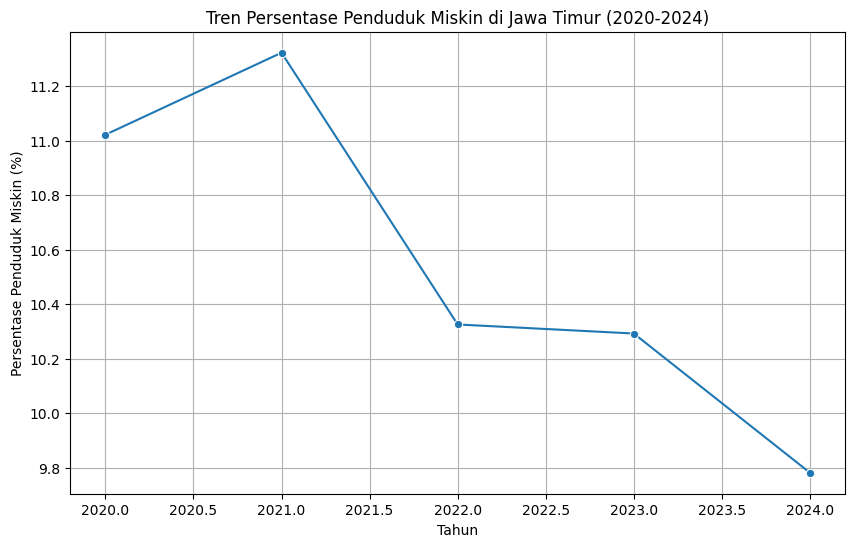

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='tahun', y='persentase_penduduk_miskin_(persen)', marker='o', ci=None)
plt.title('Tren Persentase Penduduk Miskin di Jawa Timur (2020-2024)')
plt.xlabel('Tahun')
plt.ylabel('Persentase Penduduk Miskin (%)')
plt.grid(True)
plt.show()

In [13]:
import pandas as pd

# Pilih fitur yang mau dipakai
fitur_dashboard = [
    "indeks_pembangunan_manusia_(ipm)",
    "pengeluaran_per_kapita_riil_disesuaikan_(ribu_rupiah)",
    "tingkat_pengangguran_terbuka_(tpt)_-_agustus",
    "gini_ratio",
    "persentase_rumah_tangga_dengan_akses_air_bersih",
    "jumlah_penerima_bansos"
]

# Filter hanya tahun 2020–2024
df_filtered = df[df["tahun"].between(2020, 2024)]

# Hitung rata-rata seluruh kabupaten/kota
jatim_rata2 = df_filtered[fitur_dashboard].mean()

# Ubah jadi DataFrame biar rapi
jatim_rata2 = jatim_rata2.reset_index()
jatim_rata2.columns = ["fitur", "rata2_2020_2024"]

print(jatim_rata2)


                                               fitur  rata2_2020_2024
0                   indeks_pembangunan_manusia_(ipm)        73.924105
1  pengeluaran_per_kapita_riil_disesuaikan_(ribu_...     11891.121053
2       tingkat_pengangguran_terbuka_(tpt)_-_agustus         5.140053
3                                         gini_ratio       300.203632
4    persentase_rumah_tangga_dengan_akses_air_bersih        95.717211
5                             jumlah_penerima_bansos      2088.789474


In [14]:
# Urutkan data berdasarkan 'tahun' dan 'kabupaten/kota'
df.sort_values(by=['kabupaten/kota', 'tahun'], inplace=True)

df['laju_pertumbuhan_ipm'] = df.groupby('kabupaten/kota')['indeks_pembangunan_manusia_(ipm)'].pct_change()
df['laju_pertumbuhan_pengeluaran_riil'] = df.groupby('kabupaten/kota')['pengeluaran_per_kapita_riil_disesuaikan_(ribu_rupiah)'].pct_change()
df['laju_pertumbuhan_tpt'] = df.groupby('kabupaten/kota')['tingkat_pengangguran_terbuka_(tpt)_-_agustus'].pct_change()


In [15]:
df['kemiskinan_tahun_sebelumnya'] = df.groupby('kabupaten/kota')['persentase_penduduk_miskin_(persen)'].shift(1)
df.dropna(inplace=True)

In [16]:
import pandas as pd

# misal df adalah dataframe kamu
df["jumlah_industri_total"] = (
    df["jmlh_industri_q1"] +
    df["jmlh_industri_q2"] +
    df["jmlh_industri_q3"] +
    df["jmlh_industri_q4"]
)


In [17]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

fitur = [
    'indeks_pembangunan_manusia_(ipm)',
    'tingkat_pengangguran_terbuka_(tpt)_-_agustus',
    'pengeluaran_per_kapita_riil_disesuaikan_(ribu_rupiah)',
    'gini_ratio',
    'jumlah_penerima_bansos',
    'kemiskinan_tahun_sebelumnya',
    'harapan_lama_sekolah_(tahun)',
    'status_balita_pendek',
    'produksi_padi_(ton)',
    'jumlah_industri_total',
    'laju_pertumbuhan_penduduk_per_tahun_(persen)',
    'kepadatan_penduduk_per_km_persegi_(km²)'
]

target = 'persentase_penduduk_miskin_(persen)'

X = df[fitur]
y = df[target]

X_train = df[df['tahun'] < 2024][fitur]
y_train = df[df['tahun'] < 2024][target]

X_test = df[df['tahun'] == 2024][fitur]
y_test = df[df['tahun'] == 2024][target]

print(f"Jumlah data training: {len(X_train)} baris")
print(f"Jumlah data testing: {len(X_test)} baris")


Jumlah data training: 114 baris
Jumlah data testing: 38 baris


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nEvaluasi Model pada Data Uji Tahun 2024:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")



Evaluasi Model pada Data Uji Tahun 2024:
Mean Squared Error (MSE): 0.3572
Root Mean Squared Error (RMSE): 0.5977
R-squared (R2): 0.9793


In [19]:
df_historical_growth = df[(df['tahun'] >= 2021) & (df['tahun'] <= 2024)]

numeric_cols = df_historical_growth.select_dtypes(include=['int64','float64']).columns
avg_growth = df_historical_growth.groupby('tahun')[numeric_cols].mean().pct_change().mean()

fitur = [
    'indeks_pembangunan_manusia_(ipm)',
    'tingkat_pengangguran_terbuka_(tpt)_-_agustus',
    'pengeluaran_per_kapita_riil_disesuaikan_(ribu_rupiah)',
    'gini_ratio',
    'jumlah_penerima_bansos',
    'kemiskinan_tahun_sebelumnya',
    'harapan_lama_sekolah_(tahun)',
    'status_balita_pendek',
    'produksi_padi_(ton)',
    'jumlah_industri_total',
    'laju_pertumbuhan_penduduk_per_tahun_(persen)',
    'kepadatan_penduduk_per_km_persegi_(km²)'
]

tahun_proyeksi = [2025, 2026, 2027]

df_base = df[df['tahun'] == 2024].copy()
df_forecast_list = []

for t in tahun_proyeksi:
    df_next = df_base.copy()
    df_next['tahun'] = t
    for col in fitur:
        df_next[col] *= (1 + avg_growth[col])
    df_forecast_list.append(df_next)
    df_base = df_next

df_forecast = pd.concat(df_forecast_list, ignore_index=True)

forecast_kemiskinan = model.predict(df_forecast[fitur])
df_forecast['kemiskinan_prediksi'] = forecast_kemiskinan

print(df_forecast[['tahun'] + fitur + ['kemiskinan_prediksi']])


     tahun  indeks_pembangunan_manusia_(ipm)  \
0     2025                         67.237691   
1     2025                         74.251260   
2     2025                         73.295322   
3     2025                         72.248821   
4     2025                         71.001070   
..     ...                               ...   
109   2027                         71.983196   
110   2027                         70.434513   
111   2027                         73.317916   
112   2027                         72.747349   
113   2027                         76.058678   

     tingkat_pengangguran_terbuka_(tpt)_-_agustus  \
0                                        5.848514   
1                                        4.495217   
2                                        4.646635   
3                                        4.381653   
4                                        3.927400   
..                                            ...   
109                                      2.771525   

/tmp/ipython-input-3127686400.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='tahun', y='persentase_kemiskinan', data=data_gabungan, marker='o', ci=None)


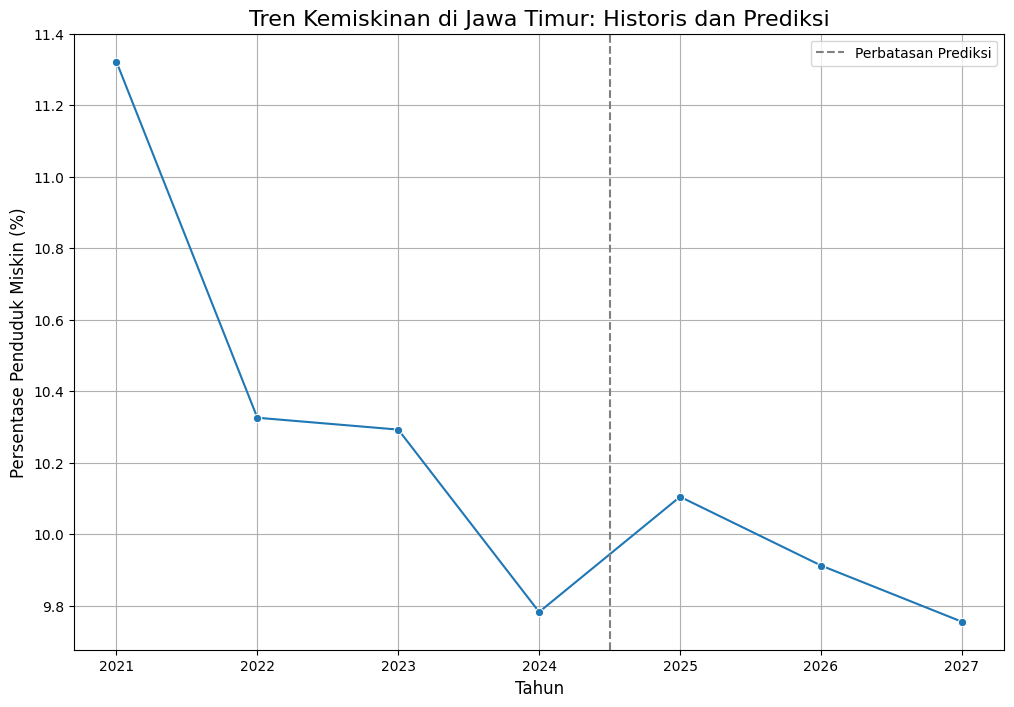

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

data_gabungan = pd.concat([
    df[['tahun', 'persentase_penduduk_miskin_(persen)']].rename(
        columns={'persentase_penduduk_miskin_(persen)': 'persentase_kemiskinan'}
    ),
    df_forecast[['tahun', 'kemiskinan_prediksi']].rename(
        columns={'kemiskinan_prediksi': 'persentase_kemiskinan'}
    )
], ignore_index=True)

plt.figure(figsize=(12, 8))
sns.lineplot(x='tahun', y='persentase_kemiskinan', data=data_gabungan, marker='o', ci=None)

plt.axvline(x=2024.5, color='gray', linestyle='--', label='Perbatasan Prediksi')

plt.title('Tren Kemiskinan di Jawa Timur: Historis dan Prediksi', fontsize=16)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Persentase Penduduk Miskin (%)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipython-input-1114314342.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


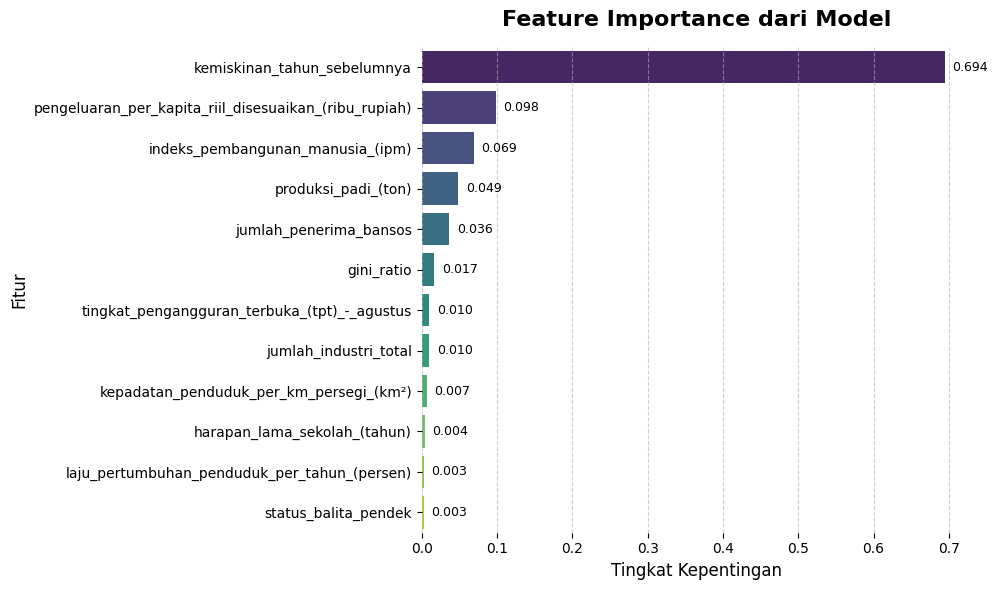

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


fitur_penting = pd.DataFrame({
    'fitur': fitur,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=fitur_penting,
    x="importance",
    y="fitur",
    palette="viridis"
)

plt.title("Feature Importance dari Model", fontsize=16, weight='bold', pad=15)
plt.xlabel("Tingkat Kepentingan", fontsize=12)
plt.ylabel("Fitur", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)
sns.despine(left=True, bottom=True)

for i, v in enumerate(fitur_penting["importance"]):
    plt.text(v + 0.01, i, f"{v:.3f}", va='center', fontsize=9)

plt.tight_layout()
plt.show()


Laju pertumbuhan kemiskinan rata-rata historis (2020-2024): 3.04% per tahun
Persentase kemiskinan terakhir (2024): 6.28%

Proyeksi kemiskinan 2025-2027:
     tahun  persentase_kemiskinan
152   2025              19.305340
153   2025               7.260643
154   2025               8.455186
155   2025              11.931651
156   2025              13.058887
..     ...                    ...
261   2027              11.440840
262   2027              17.184286
263   2027              10.271453
264   2027              13.889408
265   2027               6.206469

[114 rows x 2 columns]


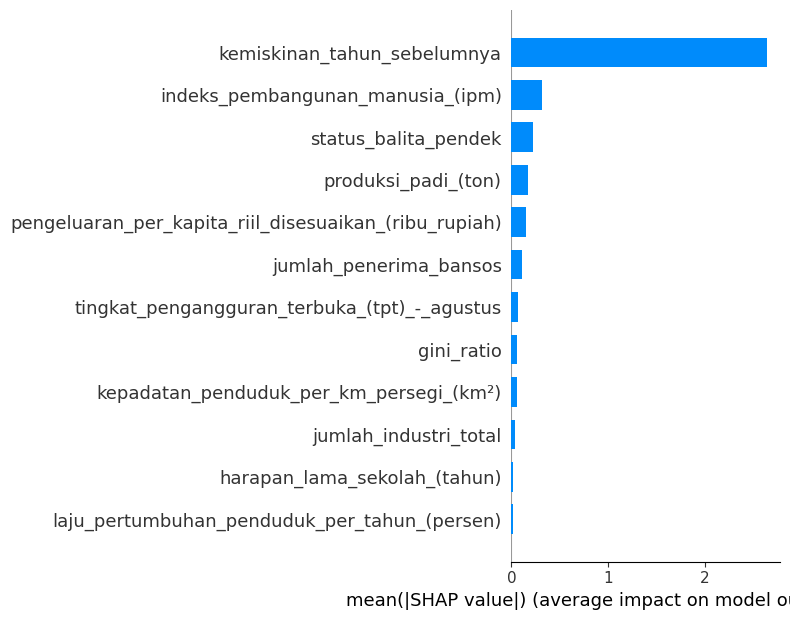


Insight tambahan:
- Kemiskinan diprediksi menurun/meningkat sesuai fitur IPM, TPT, pengeluaran per kapita, Gini ratio, dan jumlah penerima bansos.
- Fitur yang paling berpengaruh dapat dilihat pada plot SHAP, menunjukkan faktor utama prediksi.
- Laju pertumbuhan historis vs prediksi dapat dibandingkan untuk memahami perubahan tren.

Data historis dan prediksi kemiskinan berhasil disimpan ke 'kemiskinan_jatim_2020_2027.csv'


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

data_gabungan_kab = pd.concat([
    df[['tahun', 'kabupaten/kota', 'persentase_penduduk_miskin_(persen)']].rename(
        columns={'persentase_penduduk_miskin_(persen)': 'persentase_kemiskinan'}
    ),
    df_forecast[['tahun', 'kabupaten/kota', 'kemiskinan_prediksi']].rename(
        columns={'kemiskinan_prediksi': 'persentase_kemiskinan'}
    )
], ignore_index=True)

data_historis = data_gabungan[data_gabungan['tahun'] <= 2024].copy()
data_historis['pertumbuhan_tahunan'] = data_historis['persentase_kemiskinan'].pct_change() * 100

avg_growth_historis = data_historis['pertumbuhan_tahunan'].mean()
print(f"Laju pertumbuhan kemiskinan rata-rata historis (2020-2024): {avg_growth_historis:.2f}% per tahun")
print(f"Persentase kemiskinan terakhir (2024): {data_historis['persentase_kemiskinan'].iloc[-1]:.2f}%")


data_prediksi = data_gabungan[data_gabungan['tahun'] > 2024].copy()
data_prediksi['pertumbuhan_tahunan'] = data_prediksi['persentase_kemiskinan'].pct_change() * 100
print("\nProyeksi kemiskinan 2025-2027:")
print(data_prediksi[['tahun', 'persentase_kemiskinan']])

explainer = shap.Explainer(model)
shap_values = explainer(df_forecast[fitur])
shap.summary_plot(shap_values, df_forecast[fitur], plot_type="bar", show=True)

print("\nInsight tambahan:")
print("- Kemiskinan diprediksi menurun/meningkat sesuai fitur IPM, TPT, pengeluaran per kapita, Gini ratio, dan jumlah penerima bansos.")
print("- Fitur yang paling berpengaruh dapat dilihat pada plot SHAP, menunjukkan faktor utama prediksi.")
print("- Laju pertumbuhan historis vs prediksi dapat dibandingkan untuk memahami perubahan tren.")

data_gabungan_kab.to_csv('kemiskinan_jatim_per_kabupaten_2020_2027.csv', index=False)
print("\nData historis dan prediksi kemiskinan berhasil disimpan ke 'kemiskinan_jatim_2020_2027.csv'")


In [23]:
data = pd.read_csv("kemiskinan_jatim_per_kabupaten_2020_2027.csv")
data.tail(100)

,tahun,kabupaten/kota,persentase_kemiskinan
166,2025,Kota Mojokerto,5.788916
167,2025,Kota Pasuruan,6.401054
168,2025,Kota Probolinggo,6.529627
169,2025,Kota Surabaya,4.770464
170,2025,Lamongan,11.615971
...,...,...,...
261,2027,Situbondo,11.440840
262,2027,Sumenep,17.184286
263,2027,Trenggalek,10.271453
264,2027,Tuban,13.889408


Analisis ini dimulai dengan memeriksa data historis kemiskinan di Jawa Timur dari tahun 2020 sampai 2024. Selain angka kemiskinan, diperhatikan juga faktor-faktor pendukung seperti Indeks Pembangunan Manusia (IPM), tingkat pengangguran terbuka (TPT), pengeluaran per kapita riil, Gini ratio, jumlah penerima bantuan sosial, serta laju pertumbuhan IPM dan pengeluaran. Dari data ini, dihitung rata-rata pertumbuhan tahunan tiap variabel untuk melihat pola perubahan dari tahun ke tahun. Data tahun 2024 kemudian dijadikan titik awal untuk memprediksi tren kemiskinan dan faktor-faktor terkait ke tahun 2025–2027. Proyeksi dilakukan secara bertahap, di mana setiap tahun baru dihitung berdasarkan hasil tahun sebelumnya, sehingga pola masa depan lebih realistis.

Setelah proyeksi selesai, model XGBoost yang sudah dilatih digunakan untuk memprediksi tingkat kemiskinan di setiap kabupaten atau kota. Hasil prediksi disimpan dalam kolom kemiskinan_prediksi dan digabungkan dengan data historis, menghasilkan DataFrame lengkap untuk 2020–2027. Jika kolom kabupaten/kota disertakan, kita bisa melihat prediksi per wilayah, sehingga lebih mudah untuk mengidentifikasi daerah yang berpotensi tinggi atau rendah kemiskinannya. Semua data ini bisa disimpan dalam format CSV untuk analisis lebih lanjut atau laporan resmi.

Untuk memvisualisasikan tren, dibuat grafik garis yang menampilkan persentase kemiskinan historis dan prediksi. Garis putus-putus menandai batas antara data historis dan prediksi, sehingga perbedaan masa lalu dan masa depan terlihat jelas. Dari grafik dan perhitungan numerik, terlihat laju pertumbuhan kemiskinan rata-rata, persentase kemiskinan terakhir, serta proyeksi penurunan atau kenaikan kemiskinan hingga 2027. Lebih jauh lagi, analisis menggunakan SHAP menunjukkan faktor-faktor yang paling berpengaruh terhadap prediksi, seperti IPM, pengeluaran per kapita, TPT, Gini ratio, dan jumlah penerima bantuan sosial. Ini membantu memahami apa yang sebenarnya memengaruhi kemiskinan di Jawa Timur dan bisa menjadi dasar pengambilan kebijakan yang lebih tepat sasaran.

Secara keseluruhan, proses ini menggabungkan data historis, proyeksi kuantitatif, prediksi machine learning, visualisasi, dan interpretasi faktor penting. Hasilnya memberikan gambaran menyeluruh tentang kemiskinan di Jawa Timur dari 2020 sampai 2027, baik secara provinsi maupun per kabupaten/kota, dan bisa langsung digunakan sebagai bahan laporan, penelitian, atau perencanaan kebijakan sosial yang lebih efektif.

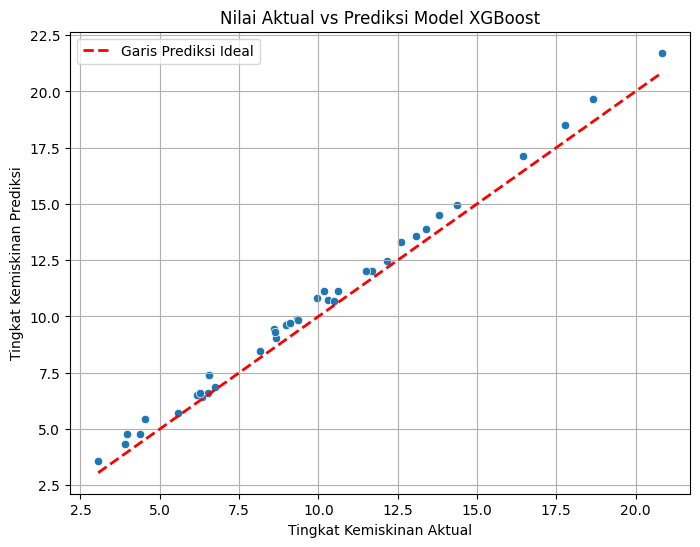

In [24]:
# Plot nilai aktual vs nilai prediksi
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Garis Prediksi Ideal')
plt.title('Nilai Aktual vs Prediksi Model XGBoost')
plt.xlabel('Tingkat Kemiskinan Aktual')
plt.ylabel('Tingkat Kemiskinan Prediksi')
plt.legend()
plt.grid(True)
plt.show()

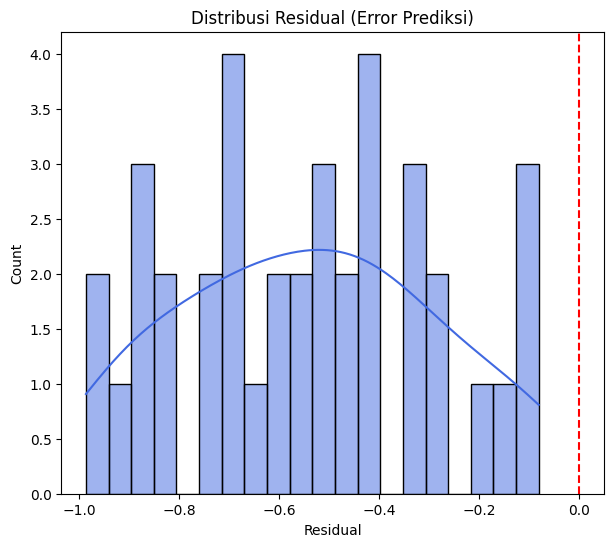

In [25]:
residuals = y_test - y_pred
plt.figure(figsize=(7,6))
sns.histplot(residuals, kde=True, bins=20, color="royalblue")
plt.axvline(0, color="red", linestyle="--")
plt.title("Distribusi Residual (Error Prediksi)")
plt.xlabel("Residual")
plt.show()

In [26]:
import pandas as pd

dap = pd.read_csv("kemiskinan_jatim_per_kabupaten_2020_2027.csv")

pivot = dap.pivot(index="kabupaten/kota", columns="tahun", values="persentase_kemiskinan")
pivot["rata_rata_2020_2024"] = pivot.loc[:, 2020:2024].mean(axis=1)

result = pivot[["rata_rata_2020_2024", 2025, 2026, 2027]].reset_index()

result = result.rename(columns={
    2025: "proyeksi_2025",
    2026: "proyeksi_2026",
    2027: "proyeksi_2027"
})

print(result.tail())

output_file = "proyeksi_kemiskinan_jatim.xlsx"
result.to_excel(output_file, index=False)

print(f"\nFile berhasil dibuat: {output_file}")


tahun kabupaten/kota  rata_rata_2020_2024  proyeksi_2025  proyeksi_2026  \
33         Situbondo              11.9550      11.786204      11.430552   
34           Sumenep              18.9375      17.384096      17.362280   
35        Trenggalek              11.0575      10.481933      10.498004   
36             Tuban              15.1500      14.646025      14.162927   
37       Tulungagung               6.7575       6.767316       6.844065   

tahun  proyeksi_2027  
33         11.440840  
34         17.184286  
35         10.271453  
36         13.889408  
37          6.206469  

File berhasil dibuat: proyeksi_kemiskinan_jatim.xlsx
